In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df_original = pd.read_excel('./Manual_base.xlsx')
df_original = df_original[((df_original['GDP, $bln'] != 0) &
                           (df_original['Date'].dt.month
                            == 10))]  # Используем только данные за 4ый квартал и ВВП !=0
df_original['Year'] = df_original['Date'].dt.year
df_original.sort_values(['Country','Year'], ignore_index=True, inplace=True)
# df.isna().sum() # для просмотра заполнения параметров

In [3]:
COLUMNS = {
    'date':
    'Date',
    'year':
    'Year',
    'country':
    'Country',
    'region':
    'Region',
    'gdp':
    'GDP, $bln',
    'net_dividends_paid_by_nonfin_corp':
    'Net Dividends Paid By Nonfinancial Corporates',
    'net_dividends_paid_by_fin_corp':
    'Net Dividends Paid By Financial Corporates',
    'dividends_paid_abroad':
    'Dividends Paid Abroad',
    'fpi_into_domestic_equity_level':
    'FPI into Domestic Equity LEVEL',
    'fdi_into_domestic_equity_level':
    'FDI into Domestic Equity LEVEL',
    'domestic_companies_mrk_cap':
    'Domestic Public Companeis MktCap\n// INTERPOLATED',
    'domestic_companies_cap':
    'Domestic Companeis Capitalization\n// INTERPOLATED',
    'bop_implied_dividends_yield':
    'BOP-implied Dividends Yield, %',
    'net_dividends_paid_by_fin_corp_divide_gdp':
    'Net Dividends Paid By Financial Corporates / GDP %',
    'net_dividends_paid_by_nonfin_corp_divide_gdp':
    'Net Dividends Paid By Nonfinancial Corporates / GDP %',
    'dividends_paid_abroad_divide_gdp':
    'Dividends Paid Abroad, %GDP',
    'fdi_into_domestic_equity_level_divide_gdp':
    'FDI into Domestic Equity LEVEL / GDP %',
    'fpi_into_domestic_equity_level_divide_gdp':
    'FPI into Domestic Equity LEVEL / GDP %',
    'domestic_companies_mrk_cap_divide_gdp':
    'Domestic Companies MrkСap, $bln / GDP, %',
    
    'd_fixed_assets_of_nonfin_corp':
    'Δ Fixed Assets of Nonfinancial Corporates',
    'd_fixed_assets_of_fin_corp':
    'Δ Fixed Assets of Financial Corporates',
    'd_fixed_assets_of_noncorp':
    'Δ Fixed Assets of Noncorporates',
    'd_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp':
    'Δ Fixed Assets of Nonfinancial Corporates / (Δ Fixed Assets of Nonfinancial Corporates + Δ Fixed Assets of Financial Corporates)',
    'd_fixed_assets_of_corp / d_fixed_assets_of_total_econ':
    'Δ Fixed Assets of Corporates / Δ Fixed Assets of Total Economy',
    'd_fixed_assets_of_total_econ':
    'Δ Fixed Assets (excl. Inventories) of Total Economy',
    'd_inventories_of_total_econ':
    'Δ Inventories of Total Economy',
    
    'd_net_debt_of_gen_gov':
    'Δ Net Debt of General Government',
    'gov_deficit_gdp':
    'Government Deficit, %GDP', 
    'd_net_debt_of_nonfin_corp':
    'Δ Net Debt of Nonfinancial Corporates',
    'd_net_debt_of_fin_corp':
    'Δ Net Debt of Financial Corporates',  
    'd_net_debt_of_noncorp':
    'Δ Net Debt of Noncorporates',
    'pers_disp_income':
    'Personal Disposable Income',
    'pers_disp_income_gdp':
    'Personal Disposable Income, %GDP',
    'pers_saving_ratio':
    'Personal Saving Ratio',
    'd_net_debt_of_hh':
    'Δ Net Debt of Households and NISH',
    'd_net_debt_of_hh / pers_saving':
    'Delta Net Debt of HH / Personal Saving',
    'curr_account':
    'Current Account',
    'curr_account_divide_gdp':
    'Current Account / GDP'
}

existed_columns = set(COLUMNS.values()).intersection(df_original.columns)
missed_columns = set(COLUMNS.values()).difference(existed_columns)
df = df_original[existed_columns]
df = pd.concat([df, pd.DataFrame(columns=list(missed_columns))])

df.rename(columns={value: key for key, value in COLUMNS.items()}, inplace=True)
df = df.astype({'year': np.int64})

df.set_index(['year', 'region', 'country'], inplace=True)
#df.set_index(['region', 'year', 'country'], inplace=True)

# df.isna().sum() # для просмотра заполнения параметров

In [4]:
df['net_dividends_paid_by_nonfin_corp_divide_gdp'] = (
    df['net_dividends_paid_by_nonfin_corp'] / df['gdp'])
df['net_dividends_paid_by_fin_corp_divide_gdp'] = (
    df['net_dividends_paid_by_fin_corp'] / df['gdp'])
df['dividends_paid_abroad_divide_gdp'] = (
    df['dividends_paid_abroad'] / df['gdp'])
df['fdi_into_domestic_equity_level_divide_gdp'] = (
    df['fdi_into_domestic_equity_level'] / df['gdp'])
df['fpi_into_domestic_equity_level_divide_gdp'] = (
    df['fpi_into_domestic_equity_level'] / df['gdp'])
df['domestic_companies_mrk_cap_divide_gdp'] = (
    df['domestic_companies_mrk_cap'] / df['gdp'])

df['d_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp'] = (
    df['d_fixed_assets_of_nonfin_corp'] / (df['d_fixed_assets_of_nonfin_corp']+df['d_fixed_assets_of_fin_corp']))
df['d_fixed_assets_of_corp / d_fixed_assets_of_total_econ'] = (
    (df['d_fixed_assets_of_nonfin_corp']+df['d_fixed_assets_of_fin_corp']) / df['d_fixed_assets_of_total_econ'])
df['d_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ'] = (
    (df['d_fixed_assets_of_nonfin_corp']+df['d_fixed_assets_of_fin_corp']) / df['d_fixed_assets_of_total_econ'])
df['d_fixed_assets_of_corp / d_fixed_assets_of_total_econ'] = (
    (df['d_fixed_assets_of_nonfin_corp']+df['d_fixed_assets_of_fin_corp']) / df['d_fixed_assets_of_total_econ'])
df['d_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ'] = (
    (df['d_fixed_assets_of_noncorp']) / df['d_fixed_assets_of_total_econ'])

df['curr_account_divide_gdp'] = (
    df['curr_account'] / df['gdp'])
#df['d_fixed_assets_of_nonfin_corp_f']=df['d_fixed_assets_of_total_econ']*df['d_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp']*df['d_fixed_assets_of_corp / d_fixed_assets_of_total_econ']+df['d_inventories_of_total_econ']
#print(df['country'].to_string(), df['net_dividends_paid_by_nonfin_corp_divide_gdp'].to_string())
#Можно создать функцию, которая вставляет значения до и после. Создать пустую переменную и в нее вложить
#df.isna().sum() # для просмотра заполнения параметров

In [5]:
def check_possible_for_trand_line(lst: pd.Series,
                                  count_in_a_row: int = 5) -> bool:
    """ Проверяем возможно ли построить линию тренда (требуется count_in_a_row точек подряд) """
    return lst.rolling(count_in_a_row).sum().notna().sum() > 0


def my_interpolate(original_lst):
    original_lst: pd.Series = original_lst
    index_min = original_lst.index[0]
    index_max = original_lst.index[-1]
    x1, x2 = 1, 5

    
    def pointwise(x0):
        direction = get_direction(x0)
        if direction:
            f_x1 = original_lst.loc[x0 - x1 * direction]
            f_x2 = original_lst.loc[x0 - x2 * direction]
            original_lst.loc[x0] = f_x1 + (0 - x1) * ((f_x2 - f_x1) / (x2 - x1))
            
    
    def get_direction(x0):
        direction = None
        if (x0 - x2 >= index_min) and original_lst.loc[x0 - x2:x0 -
                                                       1].isnull().sum() == 0:
            direction = 1
        elif (x0 + x2 <= index_max) and (
                original_lst.loc[x0 + 1:x0 + x2].isnull().sum() == 0):
            direction = -1
        return direction
    
    def ufunclike(xs):
        list(map(pointwise, xs))

    return ufunclike

def set_values_by_line_trand(df: pd.DataFrame, column_name: str) -> None:
    """ Проставляет значения в колонках columns по алгоритму линейной интер/экстраполяции """
    def f(dfGroupBy):
        lst = dfGroupBy[column_name]
        if 0 < lst.isna().sum(
        ) < len(lst) - 5 and check_possible_for_trand_line(lst):
            f_x = my_interpolate(lst)
            f_x(lst[lst.isna()].index.to_list()[::-1])
            f_x(lst[lst.isna()].index.to_list()[::1])
            df[column_name].fillna(lst, inplace=True)
            #df[column_name] = np.maximum(df[column_name], 0)

    df.reset_index(inplace=True)
    df.groupby('country').apply(f)
    #df.set_index(['region', 'year', 'country'], inplace=True)
    df.set_index(['year', 'region', 'country'], inplace=True)

set_values_by_line_trand(df, "dividends_paid_abroad_divide_gdp")

set_values_by_line_trand(df, "fdi_into_domestic_equity_level_divide_gdp")

set_values_by_line_trand(df, "fpi_into_domestic_equity_level_divide_gdp")

set_values_by_line_trand(df, "domestic_companies_mrk_cap_divide_gdp")

set_values_by_line_trand(df, 'net_dividends_paid_by_nonfin_corp_divide_gdp')

set_values_by_line_trand(df, 'net_dividends_paid_by_fin_corp_divide_gdp')

#Δ Fixed Assets

set_values_by_line_trand(df, 'd_fixed_assets_of_total_econ')

set_values_by_line_trand(df, 'd_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp')

set_values_by_line_trand(df, 'd_fixed_assets_of_corp / d_fixed_assets_of_total_econ')

set_values_by_line_trand(df, 'd_inventories_of_total_econ')

set_values_by_line_trand(df,'d_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ')

#Net Debt

set_values_by_line_trand(df, 'gov_deficit_gdp')

set_values_by_line_trand(df, 'd_net_debt_of_nonfin_corp')

set_values_by_line_trand(df, 'd_net_debt_of_fin_corp')

set_values_by_line_trand(df, 'pers_disp_income_gdp')

set_values_by_line_trand(df, 'pers_saving_ratio')

#Current Account
set_values_by_line_trand(df, 'curr_account_divide_gdp')

#df.isna().sum() # для просмотра заполнения параметров
#df.index

In [6]:
def set_values_by_mean_years(df: pd.DataFrame, column_name: str):
    """ Проставляет значения в колонках columns используя среднее значение за год по всему региону"""
    tmp = df[column_name].groupby(['region', 'year']).mean()
    df[column_name].fillna(tmp.swaplevel(0, 1), inplace=True)
    #tmp = df.groupby(['region', 'year']).mean()[column_name]
    #df[column_name].fillna(tmp.swaplevel(0, 1), inplace=True)
    
set_values_by_mean_years(df, 'dividends_paid_abroad_divide_gdp')
set_values_by_mean_years(df, 'fdi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_years(df, 'fpi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_years(df, 'domestic_companies_mrk_cap_divide_gdp')
set_values_by_mean_years(df, 'net_dividends_paid_by_nonfin_corp_divide_gdp')
set_values_by_mean_years(df, 'net_dividends_paid_by_fin_corp_divide_gdp')

set_values_by_mean_years(df, 'd_fixed_assets_of_total_econ')
set_values_by_mean_years(df, 'd_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp')
set_values_by_mean_years(df, 'd_fixed_assets_of_corp / d_fixed_assets_of_total_econ')
set_values_by_mean_years(df, 'd_inventories_of_total_econ')
set_values_by_mean_years(df, 'd_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ')

set_values_by_mean_years(df, 'gov_deficit_gdp')
set_values_by_mean_years(df, 'd_net_debt_of_nonfin_corp')
set_values_by_mean_years(df, 'd_net_debt_of_fin_corp')
set_values_by_mean_years(df, 'pers_disp_income_gdp')
set_values_by_mean_years(df, 'pers_saving_ratio')

set_values_by_mean_years(df, 'curr_account_divide_gdp')

def set_values_by_mean_years(df: pd.DataFrame, column_name: str):
    """ Проставляет значения в колонках columns используя среднее значение за год по всему региону"""
    tmp = df[column_name].groupby(['region', 'year']).mean()
    df[column_name].fillna(tmp.swaplevel(0, 1), inplace=True)


set_values_by_mean_years(df, 'dividends_paid_abroad_divide_gdp')
set_values_by_mean_years(
    df, 'fdi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_years(
    df, 'fpi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_years(df,
                         'domestic_companies_mrk_cap_divide_gdp')

#df.isna().sum() # для просмотра заполнения параметров

In [7]:
def set_values_by_mean_region(df: pd.DataFrame, column_name: str) -> None:
    """ Проставляет значения в колонках columns используя среднее значение за все время по всему региону"""
    df.reset_index(inplace=True)
    df.set_index(['region', 'year', 'country'], inplace=True)
    avgs_by_region = df[column_name].groupby(['region']).mean()
    avgs_by_region.index = pd.MultiIndex.from_arrays([avgs_by_region.index], names=["region"])
    df[column_name].fillna(avgs_by_region, inplace=True)

set_values_by_mean_region(df, 'dividends_paid_abroad_divide_gdp')
set_values_by_mean_region(df, 'fdi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_region(df, 'fpi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_region(df, 'domestic_companies_mrk_cap_divide_gdp')

set_values_by_mean_region(df, 'd_fixed_assets_of_total_econ')
set_values_by_mean_region(df, 'd_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp')
set_values_by_mean_region(df, 'd_fixed_assets_of_corp / d_fixed_assets_of_total_econ')
set_values_by_mean_region(df, 'd_inventories_of_total_econ')
set_values_by_mean_region(df, 'd_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ')

set_values_by_mean_region(df, 'gov_deficit_gdp')
set_values_by_mean_region(df, 'd_net_debt_of_nonfin_corp')
set_values_by_mean_region(df, 'd_net_debt_of_fin_corp')
set_values_by_mean_region(df, 'pers_disp_income_gdp')
set_values_by_mean_region(df, 'pers_saving_ratio')

set_values_by_mean_region(df, 'curr_account_divide_gdp')

df.isna().sum() # для просмотра заполнения параметров

d_net_debt_of_nonfin_corp                                    930
dividends_paid_abroad                                       5868
d_net_debt_of_noncorp                                       5975
dividends_paid_abroad_divide_gdp                             930
gdp                                                          478
fpi_into_domestic_equity_level                              5942
d_net_debt_of_hh                                            5975
pers_saving_ratio                                           2722
d_net_debt_of_hh / pers_saving                              7186
d_fixed_assets_of_noncorp                                   5975
pers_disp_income_gdp                                        1906
d_fixed_assets_of_fin_corp                                  5975
d_fixed_assets_of_nonfin_corp                               5975
net_dividends_paid_by_fin_corp_divide_gdp                   2188
d_inventories_of_total_econ                                  930
fdi_into_domestic_equity_

In [8]:
#Умножаем посчитанные значения на ВВП
df['dividends_paid_abroad'].fillna(
    value=df['dividends_paid_abroad_divide_gdp'] * df['gdp'],
    inplace=True)
df['fdi_into_domestic_equity_level'].fillna(
    value=df['fdi_into_domestic_equity_level_divide_gdp'] *
    df['gdp'],
    inplace=True)
df['fpi_into_domestic_equity_level'].fillna(
    value=df['fpi_into_domestic_equity_level_divide_gdp'] *
    df['gdp'],
    inplace=True)
df['domestic_companies_mrk_cap'].fillna(
    value=df['domestic_companies_mrk_cap_divide_gdp'] * df['gdp'],
    inplace=True)
df['domestic_companies_cap'].fillna(
    value=df[['domestic_companies_mrk_cap', 'fpi_into_domestic_equity_level'
              ]].max(axis=1) + df['fdi_into_domestic_equity_level'].fillna(0),
    inplace=True)
df['bop_implied_dividends_yield'].fillna(
    value=df['dividends_paid_abroad'] / (df['fdi_into_domestic_equity_level'].fillna(0) +
                                         df['fpi_into_domestic_equity_level'].fillna(0)),
    inplace=True)

#Fixed Assets
df['d_fixed_assets_of_nonfin_corp'].fillna(df['d_fixed_assets_of_total_econ']* df['d_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp']*df['d_fixed_assets_of_corp / d_fixed_assets_of_total_econ']+df['d_inventories_of_total_econ'],
    inplace=True)
df['d_fixed_assets_of_fin_corp'].fillna(df['d_fixed_assets_of_total_econ']*(1-df['d_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp'])*df['d_fixed_assets_of_corp / d_fixed_assets_of_total_econ'],
    inplace=True)
df['d_fixed_assets_of_noncorp'].fillna(df['d_fixed_assets_of_total_econ']*df['d_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ'],
    inplace=True)

#Delta Net Debt
df['d_net_debt_of_gen_gov'].fillna(-df['gov_deficit_gdp']*df['gdp'],
    inplace=True)
df['d_net_debt_of_noncorp'].fillna(df['d_fixed_assets_of_noncorp'],
    inplace=True)
df['pers_disp_income'].fillna(df['pers_disp_income_gdp']*df['gdp'],
    inplace=True)
df['d_net_debt_of_hh / pers_saving'].fillna(df['d_net_debt_of_hh']/(df['pers_disp_income']*df['pers_saving_ratio']),
    inplace=True)

#Спросить у Никиты, как интерполирует d_net_debt_of_hh / pers_saving в файле Manual+ (лист AllCountries)
set_values_by_line_trand(df, 'd_net_debt_of_hh / pers_saving')
set_values_by_mean_years(df, 'd_net_debt_of_hh / pers_saving')
set_values_by_mean_region(df, 'd_net_debt_of_hh / pers_saving')

df['d_net_debt_of_hh'].fillna(df['pers_disp_income']*df['pers_saving_ratio']*df['d_net_debt_of_hh / pers_saving']-df['d_net_debt_of_noncorp'],
    inplace=True)

df['curr_account'].fillna(
    value=df['curr_account_divide_gdp'] *
    df['gdp'],
    inplace=True)
# df.isna().sum() # для просмотра заполнения параметров

In [9]:
set_values_by_line_trand(
    df, 'net_dividends_paid_by_nonfin_corp_divide_gdp')
df['net_dividends_paid_by_nonfin_corp'].fillna(
    value=df['net_dividends_paid_by_nonfin_corp_divide_gdp'] *
    df['gdp'],
    inplace=True)
df['net_dividends_paid_by_nonfin_corp'].fillna(
    value=df['domestic_companies_cap'] * df['bop_implied_dividends_yield'] -
    df['dividends_paid_abroad'],
    inplace=True)

set_values_by_line_trand(
    df, 'net_dividends_paid_by_fin_corp_divide_gdp')
df['net_dividends_paid_by_fin_corp'].fillna(
    value=df['net_dividends_paid_by_fin_corp_divide_gdp'] *
    df['gdp'],
   inplace=True)

df['net_dividends_paid_by_nonfin_corp'].fillna(
    value=df['net_dividends_paid_by_fin_corp_divide_gdp'] *
    df['gdp'],
   inplace=True)
# df.isna().sum() # для просмотра заполнения параметров
print(df.columns)

Index(['d_net_debt_of_nonfin_corp', 'dividends_paid_abroad',
       'd_net_debt_of_noncorp', 'dividends_paid_abroad_divide_gdp', 'gdp',
       'fpi_into_domestic_equity_level', 'd_net_debt_of_hh',
       'pers_saving_ratio', 'd_net_debt_of_hh / pers_saving',
       'd_fixed_assets_of_noncorp', 'pers_disp_income_gdp',
       'd_fixed_assets_of_fin_corp', 'd_fixed_assets_of_nonfin_corp',
       'net_dividends_paid_by_fin_corp_divide_gdp',
       'd_inventories_of_total_econ', 'fdi_into_domestic_equity_level',
       'net_dividends_paid_by_nonfin_corp', 'd_net_debt_of_gen_gov',
       'd_fixed_assets_of_total_econ', 'd_net_debt_of_fin_corp',
       'net_dividends_paid_by_fin_corp', 'curr_account', 'gov_deficit_gdp',
       'pers_disp_income', 'date', 'domestic_companies_mrk_cap_divide_gdp',
       'fpi_into_domestic_equity_level_divide_gdp',
       'bop_implied_dividends_yield', 'curr_account_divide_gdp',
       'net_dividends_paid_by_nonfin_corp_divide_gdp',
       'd_fixed_assets_of_non

In [10]:
df=df.reset_index()

In [11]:
# Если Region Counter 0, то
# суммируем все ряды по году (поле Date) и по полю Region - North America

# по колонкам ряды по колонкам Domestic Profits [CPD] (3), Corporate Profits [CPD] (7), Noncorporate Profits [CPD] (19)
# Net Dividends Paid By Nonfinancial Corporates (29)	 Net Dividends Paid By Financial Corporates
# Net Dividends and Withdrawals from Income Paid By Noncorporates 	 Δ Fixed Assets of Nonfinancial Corporates 	
# Δ Fixed Assets of Financial Corporates	  Δ Fixed Assets of Noncorporates 	Δ Net Debt of Households and NISH	 
# Δ Net Debt of General Government 	 Δ Net Debt of Nonfinancial Corporates
# Δ Net Debt of Financial Corporates 	 Δ Net Debt of Noncorporates 	 
# RoW - Δ Net Equity Issued ("-") / Bought Back ("+") / Sold ("-") / Acquired ("+") 
# Nonfinancial Corporates - Δ Net Equity Issued ("-") / Bought Back ("+") / Sold ("-") / Acquired ("+") 
# Financial Corporates - Δ Net Equity Issued ("-") / Bought Back ("+") / Sold ("-") / Acquired ("+")
# Noncorporates - Δ Net Equity Issued ("-") / Bought Back ("+") / Sold ("-") / Acquired ("+") 
# Current Account	 Nonfinancial Corporates - Net Capital Transfers Paid 	 
# Financial Corporates - Net Capital Transfers Paid 	Noncorporates - Net Capital Transfers Paid	 
# Nonfinancial Corporates - Discrepancies 	 Financial Corporates - Discrepancies 	Noncorporates - Discrepancies	
# Corporates - Discrepancies	Domestic Business - Discrepancies (52)

# df.drop(df[df['Код расходов (План)'] == 'No'].index, inplace = True)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# df[df.year== 2020][df.region=="Advanced Asia"][df.country=="Advanced Asia"].at[14, "fdi_into_domestic_equity_level"]

# df=df.reset_index()
# print(df)

# Нужно составить лист с регионами по показателям и заменять их на значения
# И ТУТ ПО ГОДАМ НУЖНО СОСТАВИТЬ СПИСОК
df3 = df.groupby(['year', 'region']).sum().fdi_into_domestic_equity_level.to_frame()
df4 = df3.query('year > 2007 and region == "Advanced Asia"')
# df3 = df.groupby(['year', 'region']).apply(lambda g: g.fdi_into_domestic_equity_level.sum())
# print(df3.index)
# print(df.at[1947, ''])
# print(df3)
# print(df3.index())
# df3 = df3.reset_index('year')
# df4 = df3.loc[2006, 'Advanced Asia']
print(df4)

# print(df3.loc[df3['region'] == "Advanced Asia"])

# [fdi_into_equity_domestic_level]

# print(df3.at["North America", ])
# for every year df("year").groupby('region')
# df2 = df.groupby('region').sum().fdi_into_domestic_equity_level
# print(df2)
#df2= df2.at['Advanced Asia', 'fdi_into_domestic_equity_level']
# print(df2)
# for i in range(2006, 2023):
# df[df.year== 2020][df.region=="Advanced Asia"][df.country=="Advanced Asia"].at[14, "fdi_into_domestic_equity_level"]
# df[df.year== 2020][df.region=="Advanced Asia"][df.country=="Advanced Asia"].replace({'fdi_into_domestic_equity_level': np.nan}, df2)
df[df.region=="Advanced Asia"][df.country=="Advanced Asia"].replace({'fdi_into_domestic_equity_level': np.nan}, df4.fdi_into_domestic_equity_level)

# spending = spending_merged.merge(df_code, on=['Код расходов (План)', 'Код подрасходов (План)'], how='inner')

# Не забудь добавить , inplace = True

                    fdi_into_domestic_equity_level
year region                                       
2008 Advanced Asia                      210.176695
2009 Advanced Asia                      315.026797
2010 Advanced Asia                      433.293817
2011 Advanced Asia                      471.190827
2012 Advanced Asia                      688.174763
2013 Advanced Asia                      742.417303
2014 Advanced Asia                      740.096319
2015 Advanced Asia                      785.283381
2016 Advanced Asia                      872.733724
2017 Advanced Asia                      897.742841
2018 Advanced Asia                      906.916142
2019 Advanced Asia                      978.093316
2020 Advanced Asia                     1081.093331
2021 Advanced Asia                     1146.983835
2022 Advanced Asia                     1238.758508
2023 Advanced Asia                     1343.712818


,year,region,country,d_net_debt_of_nonfin_corp,dividends_paid_abroad,d_net_debt_of_noncorp,dividends_paid_abroad_divide_gdp,gdp,fpi_into_domestic_equity_level,d_net_debt_of_hh,...,fpi_into_domestic_equity_level_divide_gdp,bop_implied_dividends_yield,curr_account_divide_gdp,net_dividends_paid_by_nonfin_corp_divide_gdp,d_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp,domestic_companies_cap,fdi_into_domestic_equity_level_divide_gdp,domestic_companies_mrk_cap,d_fixed_assets_of_corp / d_fixed_assets_of_total_econ,d_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ
0,2006,Advanced Asia,Advanced Asia,4.352181,NaN,0.0,0.004251,NaN,NaN,NaN,...,0.039996,NaN,0.028280,-0.000431,0.997480,NaN,0.130600,NaN,0.308139,0.0
1,2007,Advanced Asia,Advanced Asia,-10.133465,NaN,0.0,0.003970,NaN,NaN,NaN,...,0.067065,NaN,0.023485,0.000835,0.999674,NaN,0.157281,NaN,0.234281,0.0
2,2008,Advanced Asia,Advanced Asia,28.889482,NaN,0.0,0.003294,NaN,NaN,NaN,...,0.073616,NaN,0.000747,0.012372,0.997126,NaN,0.115178,NaN,0.438828,0.0
3,2009,Advanced Asia,Advanced Asia,-23.634887,NaN,0.0,0.002620,NaN,NaN,NaN,...,0.025650,NaN,0.018360,0.010185,0.994910,NaN,0.176010,NaN,0.512976,0.0
4,2010,Advanced Asia,Advanced Asia,-17.021411,NaN,0.0,0.002927,NaN,NaN,NaN,...,0.070466,NaN,0.006868,0.026063,0.991918,NaN,0.199159,NaN,0.896588,0.0
5,2011,Advanced Asia,Advanced Asia,-8.524094,NaN,0.0,0.003508,NaN,NaN,NaN,...,0.099407,NaN,0.001932,0.046612,0.999120,NaN,0.190773,NaN,0.941120,0.0
6,2012,Advanced Asia,Advanced Asia,51.621703,NaN,0.0,0.002811,NaN,NaN,NaN,...,0.078922,NaN,-0.031055,0.030825,0.977705,NaN,0.165950,NaN,0.714598,0.0
7,2013,Advanced Asia,Advanced Asia,58.759940,NaN,0.0,0.002490,NaN,NaN,NaN,...,0.089486,NaN,-0.035819,0.028566,0.979105,NaN,0.174967,NaN,0.701625,0.0
8,2014,Advanced Asia,Advanced Asia,7.505296,NaN,0.0,0.002712,NaN,NaN,NaN,...,0.076618,NaN,-0.018524,0.026842,0.981658,NaN,0.166975,NaN,0.717377,0.0
9,2015,Advanced Asia,Advanced Asia,-10.224955,NaN,0.0,0.002483,NaN,NaN,NaN,...,0.094083,NaN,-0.014545,0.037391,0.974157,NaN,0.176909,NaN,0.732262,0.0


In [12]:
if len(df.index.names)>1: 
    df.reset_index(inplace=True)

# форматируем таблицу для удобного визуального просмотра excel
tmp_df = df.copy()
tmp_df.drop(['date', 'gdp', 'country', 'region', 'year'], axis=1, inplace=True)
tmp_df.columns = [f'{val}_interpolated' for val in tmp_df.columns]
df_res = pd.concat([tmp_df, df_original], axis=1)
df_res.rename(columns={f'{key}_interpolated': f'{val} [interpolated]' for key, val in COLUMNS.items()}, inplace=True)
columns_1 = set(['Date', 'Country','Region', 'GDP, $bln'])
result_columns = list(columns_1)
result_columns.extend(sorted(list(set(df_res.columns.to_list()).difference(columns_1))))

# df_res[result_columns].head() #

In [13]:
# #Если Region Counter 0, то
# # суммируем все ряды по году (поле Date) и по полю Region - North America

# # по колонкам ряды по колонкам Domestic Profits [CPD] (3), Corporate Profits [CPD] (7), Noncorporate Profits [CPD] (19)
# # Net Dividends Paid By Nonfinancial Corporates (29)	 Net Dividends Paid By Financial Corporates
# # Net Dividends and Withdrawals from Income Paid By Noncorporates 	 Δ Fixed Assets of Nonfinancial Corporates 	
# # Δ Fixed Assets of Financial Corporates	  Δ Fixed Assets of Noncorporates 	Δ Net Debt of Households and NISH	 
# # Δ Net Debt of General Government 	 Δ Net Debt of Nonfinancial Corporates
# # Δ Net Debt of Financial Corporates 	 Δ Net Debt of Noncorporates 	 
# # RoW - Δ Net Equity Issued ("-") / Bought Back ("+") / Sold ("-") / Acquired ("+") 
# # Nonfinancial Corporates - Δ Net Equity Issued ("-") / Bought Back ("+") / Sold ("-") / Acquired ("+") 
# # Financial Corporates - Δ Net Equity Issued ("-") / Bought Back ("+") / Sold ("-") / Acquired ("+")
# # Noncorporates - Δ Net Equity Issued ("-") / Bought Back ("+") / Sold ("-") / Acquired ("+") 
# # Current Account	 Nonfinancial Corporates - Net Capital Transfers Paid 	 
# # Financial Corporates - Net Capital Transfers Paid 	Noncorporates - Net Capital Transfers Paid	 
# # Nonfinancial Corporates - Discrepancies 	 Financial Corporates - Discrepancies 	Noncorporates - Discrepancies	
# # Corporates - Discrepancies	Domestic Business - Discrepancies (52)

# df.drop(df[df['Код расходов (План)'] == 'No'].index, inplace = True)
# ряды по полю Region - North America 
# print(df.loc[:, 1])
# print(df[['country']])
# print(df_res[['country']])
# print(df_res[result_columns])

In [14]:
df_output = df_res[result_columns]
df_res[result_columns].to_excel('./output.xlsx')

<AxesSubplot:xlabel='Year'>

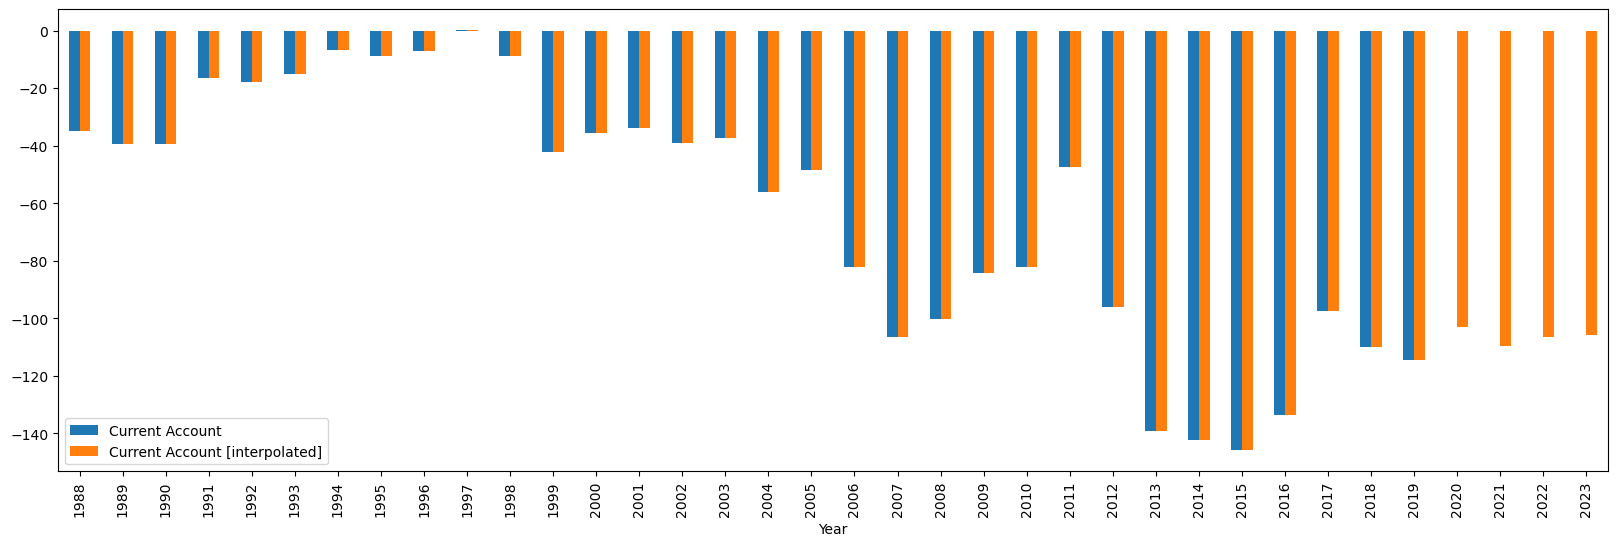

In [15]:
#Указать показатель, который хотим визулизировать
Indicator='Current Account'

# Указать страну
country = 'UK'
# Указать параметр(столбец)
column_interpolated = Indicator
column_manual = f'{Indicator} [interpolated]'

#df_output = pd.read_excel('./output.xlsx') # расскоментировать, если нужно из файла загрузить, иначе берется из ячейки выше
tmp = df_output[df_output['Country'] == country]
tmp = tmp[['Year', column_interpolated, column_manual]] # не интерполирует минусовые значения
tmp.plot.bar(x='Year', figsize=(20, 6))

<AxesSubplot:xlabel='Year'>

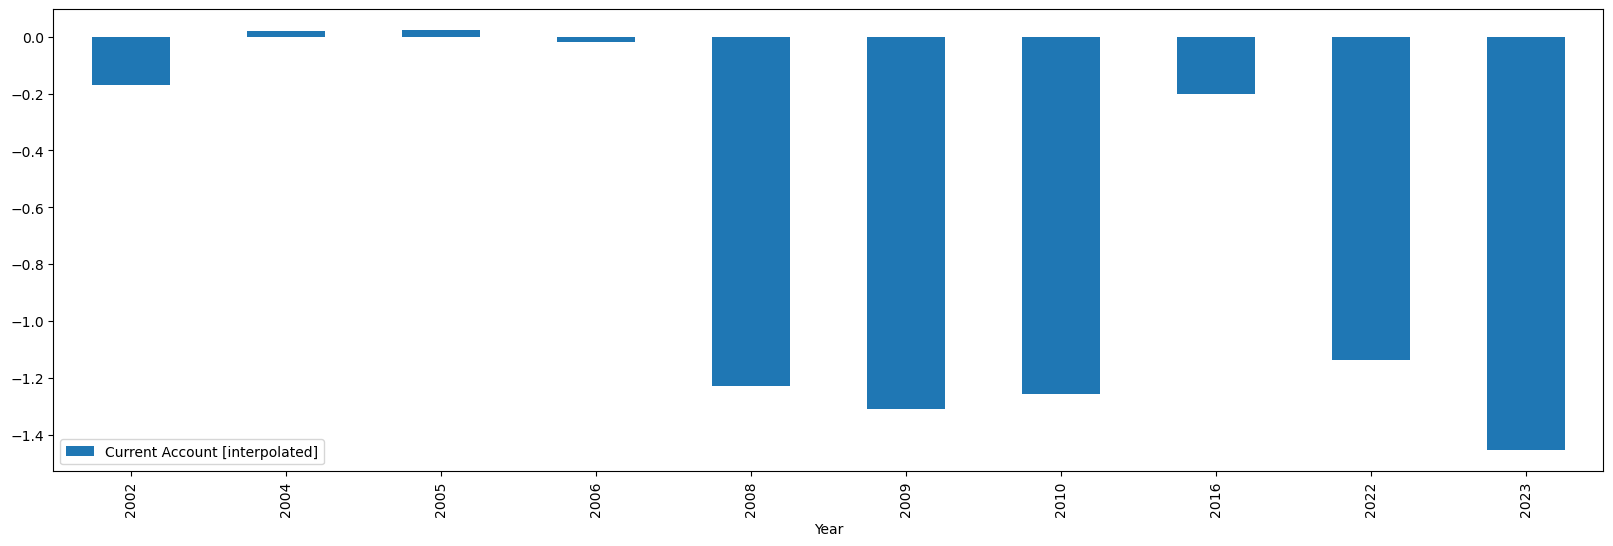

In [16]:
#Находим максимальные и минимальные (значения внутри quantile(x)) децили с двух сторон 
df = pd.read_excel('./output.xlsx')
df_outl1 = pd.DataFrame()
for i in df['Country'].unique():
    df_temp=df[df['Country'] == i]
   
    max_value=df_temp[f'{Indicator} [interpolated]'].quantile(0.8)
    min_value=df_temp[f'{Indicator} [interpolated]'].quantile(0.2)
    a=(df_temp[f'{Indicator} [interpolated]']>max_value)
    b=(df_temp[f'{Indicator} [interpolated]']<min_value)

    df_temp1=(df_temp[b|a][['Country', 'Year', f'{Indicator} [interpolated]']])
    
    df_outl1 = df_outl1.append(df_temp1)
country = 'Armenia'
tmp_outl1 = df_outl1[df_outl1['Country'] == country]
tmp_outl1 = tmp_outl1[['Year', f'{Indicator} [interpolated]']]
tmp_outl1.plot.bar(x='Year', figsize=(20, 6))

In [17]:
#Находим значения вне максимальных и минимальных децилей 
df = pd.read_excel('./output.xlsx')
df_outl2 = pd.DataFrame()
for i in df['Country'].unique():
    df_temp=df[df['Country'] == i]
   
    max_value=df_temp[f'{Indicator} [interpolated]'].quantile(0.8)
    min_value=df_temp[f'{Indicator} [interpolated]'].quantile(0.2)
    c=((df_temp[f'{Indicator} [interpolated]']>min_value)&(df_temp[f'{Indicator} [interpolated]']<max_value))
    
    df_temp2=[df_temp[c][['Country', 'Year', f'{Indicator} [interpolated]']]]
    
    df_outl2 = df_outl2.append(df_temp2)

<AxesSubplot:xlabel='Year'>

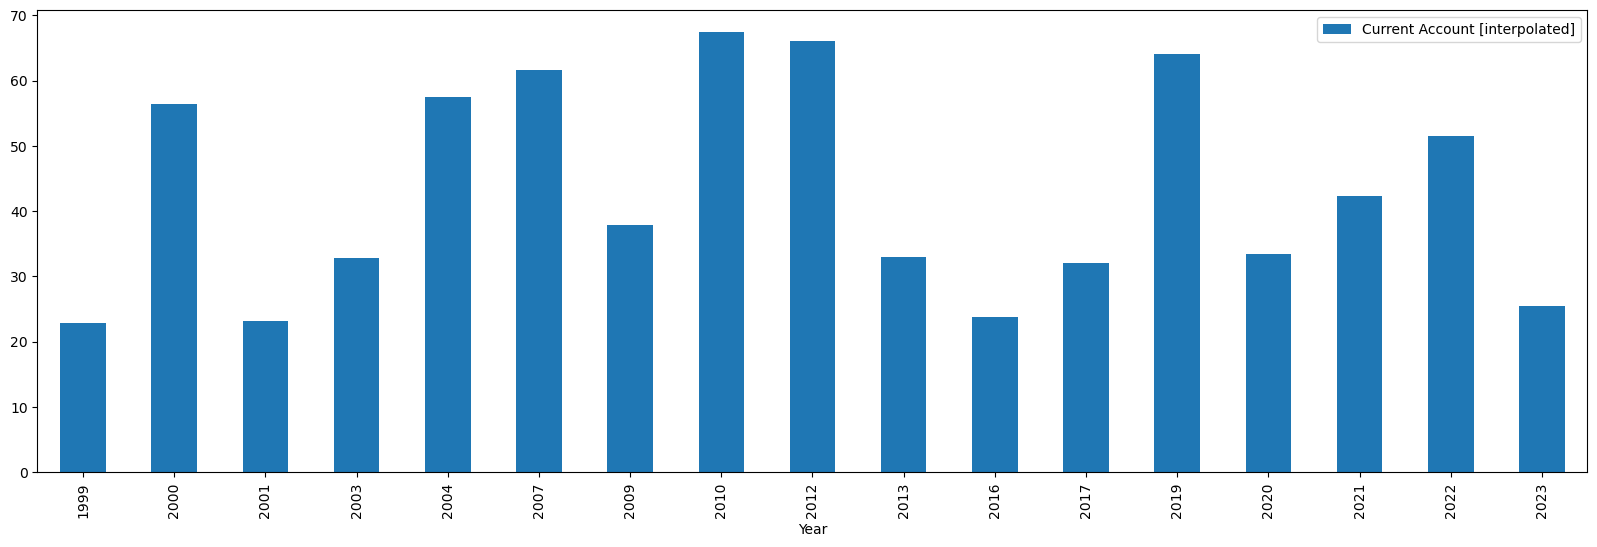

In [18]:
country = 'Russia'
tmp_outl2 = df_outl2[df_outl2['Country'] == country]
tmp_outl2 = tmp_outl2[['Year', f'{Indicator} [interpolated]']]
tmp_outl2.plot.bar(x='Year', figsize=(20, 6))

In [19]:
#Объединяем 2 массива выше
result = pd.merge(df_outl1, df_outl2, on= ['Year', 'Country'], suffixes=('_outliers', ''), how='outer')
result.fillna(0, inplace=True)
result.sort_values(by=['Country','Year'], inplace=True)
result.set_index('Year')
#print(result)

,Country,Current Account [interpolated]_outliers,Current Account [interpolated]
Year,,,
1988,Afghanistan,0.000135,0.000000
1990,Afghanistan,0.000000,0.000177
1991,Afghanistan,0.000000,0.000170
1992,Afghanistan,0.000000,0.000172
1993,Afghanistan,0.000142,0.000000
...,...,...,...
2019,Zimbabwe,-1.241917,0.000000
2020,Zimbabwe,0.000000,-1.093633
2021,Zimbabwe,-1.219401,0.000000


<AxesSubplot:title={'center':'UK'}, xlabel='Year'>

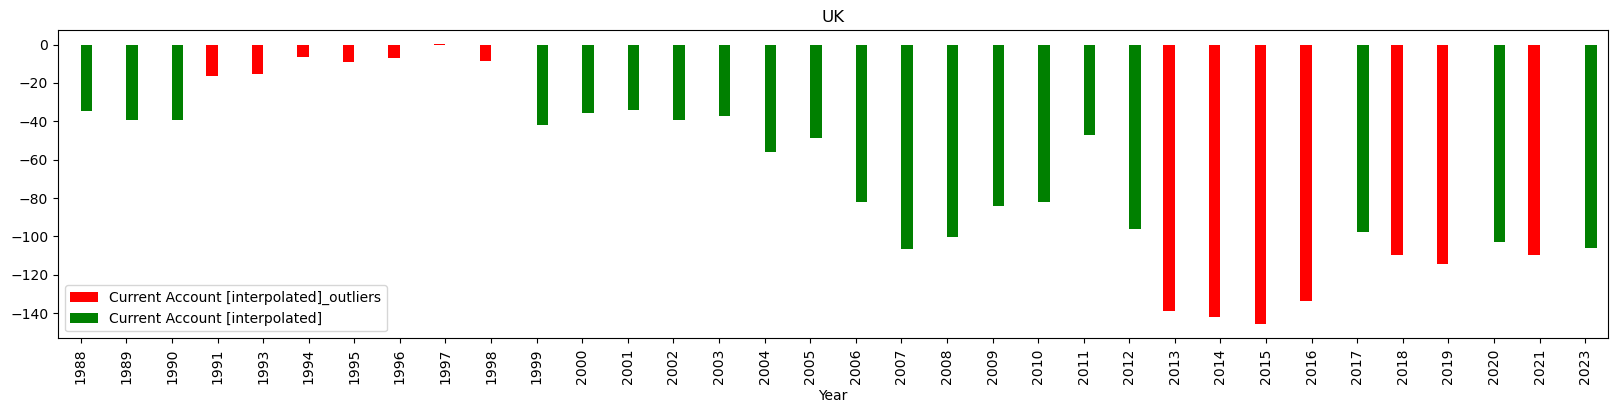

In [20]:
country = 'UK'
tmp_outl3 = result[result['Country'] == country]
tmp_outl3 = tmp_outl3[['Year', f'{Indicator} [interpolated]_outliers', f'{Indicator} [interpolated]']]
tmp_outl3.plot.bar(x='Year', figsize=(20, 4), title=country, color=["red", 'green'])

In [21]:
#Находим максимальный и минимальный дециль по разнице значений показателя
#Механизм тот же, что и выше
df = pd.read_excel('./output.xlsx')
df_outld1 = pd.DataFrame()

tail = 0.05

for i in df['Country'].unique():
    df_temp=df[df['Country'] == i]
    max_value=df_temp[f'{Indicator} [interpolated]'].diff(periods=1).quantile( 1 - tail )
    min_value=df_temp[f'{Indicator} [interpolated]'].diff(periods=1).quantile( tail )
    a=(df_temp[f'{Indicator} [interpolated]'].diff(periods=1)<min_value)
    b=(df_temp[f'{Indicator} [interpolated]'].diff(periods=1)>max_value)

    df_temp1=(df_temp[a|b][['Country', 'Year', f'{Indicator} [interpolated]']])
    
    df_outld1 = df_outld1.append(df_temp1)

df = pd.read_excel('./output.xlsx')
df_outld2 = pd.DataFrame()
for i in df['Country'].unique():
    df_temp2=df[df['Country'] == i]
   
    max_value=df_temp2[f'{Indicator} [interpolated]'].diff(periods=1).quantile( 1 - tail )
    min_value=df_temp2[f'{Indicator} [interpolated]'].diff(periods=1).quantile( tail )
    c=((df_temp2[f'{Indicator} [interpolated]'].diff(periods=1)>min_value)&(df_temp2[f'{Indicator} [interpolated]'].diff(periods=1)<max_value))

    df_temp3=[df_temp2[c][['Country', 'Year', f'{Indicator} [interpolated]']]]

    df_outld2 = df_outld2.append(df_temp3)
    
result_diff = pd.merge(df_outld1, df_outld2, on=['Year', 'Country'], suffixes=('_outliers', ''), how='outer')
result_diff.fillna(0, inplace=True)
result_diff.sort_values(by=['Country','Year'], inplace=True)

<AxesSubplot:title={'center':'UK'}, xlabel='Year'>

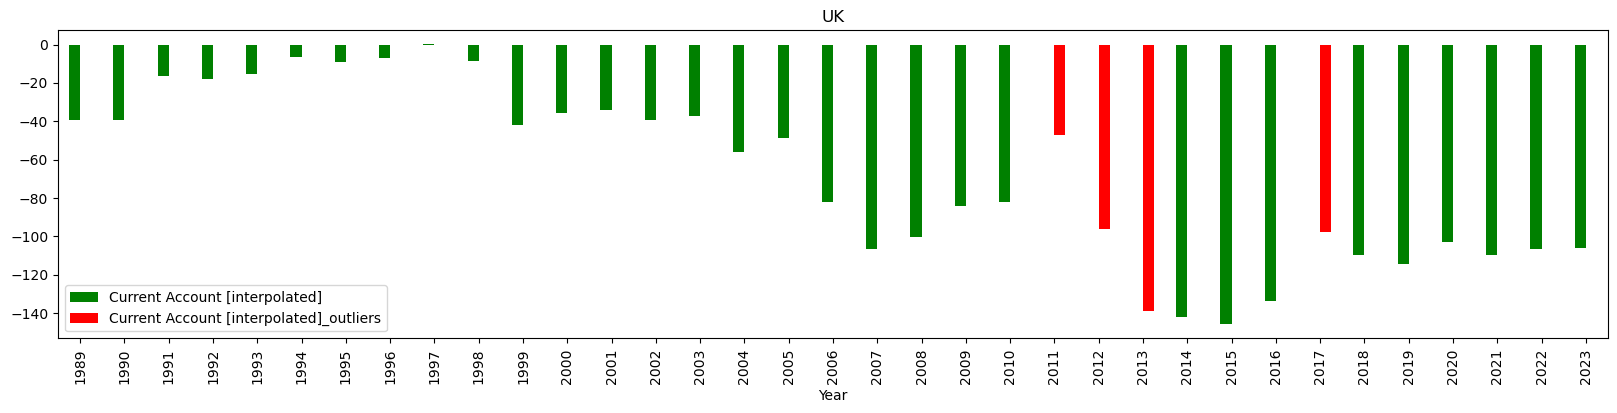

In [22]:
#Показываем на изначальном графике, где выбросы, посчитанные через разницу значений показателя 
country = 'UK'
tmp_outl_difff = result_diff[result_diff['Country'] == country]
tmp_outl_difff = tmp_outl_difff[['Year', f'{Indicator} [interpolated]',f'{Indicator} [interpolated]_outliers']]
tmp_outl_difff.plot.bar(x='Year', figsize=(20, 4), title=country, color=['green', 'red'])

In [23]:
result_diff['Sum']=result_diff[f'{Indicator} [interpolated]']+result_diff[f'{Indicator} [interpolated]_outliers']
result_diff['Diff']=result_diff['Sum'].diff()
result_diff.fillna(0, inplace=True)
result_diff.reset_index(drop = True, inplace = True)
result_diff['cindex'] = result_diff.groupby(['Country']).cumcount()+1;
result_diff.loc[result_diff.cindex == 1, 'Diff'] = 0;

<AxesSubplot:title={'center':'UK'}, xlabel='Year'>

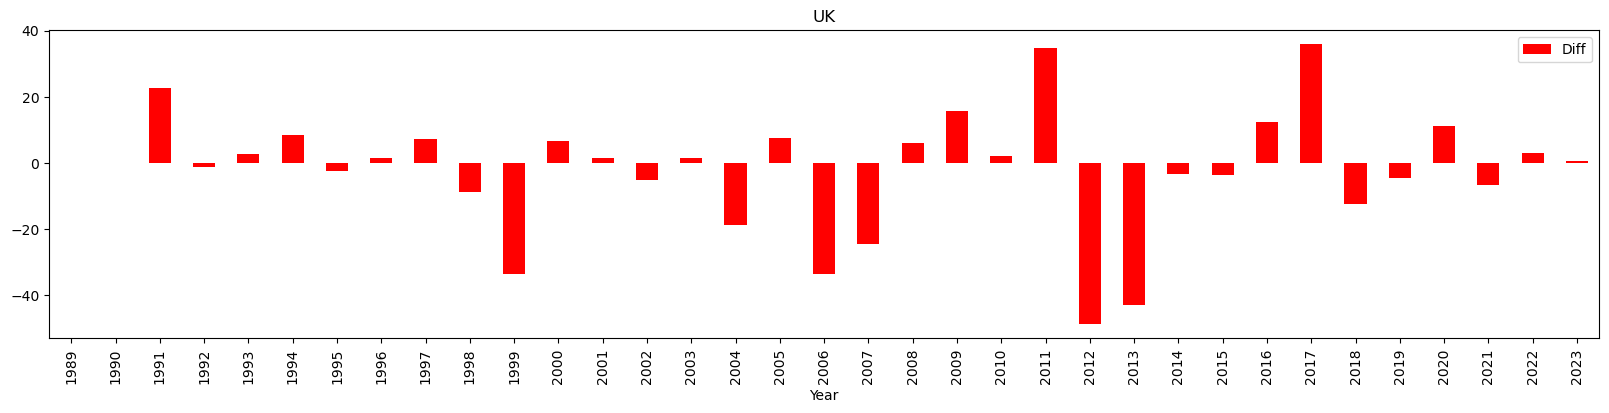

In [24]:
country = 'UK'
tmp_outl_difff = result_diff[result_diff['Country'] == country]
tmp_outl_difff = tmp_outl_difff[['Year','Diff']]
tmp_outl_difff.plot.bar(x='Year', figsize=(20, 4), title=country, color=['red', 'green'])
#print(tmp_outl_difff)

In [25]:
#Создаем новый столбец с темпом роста
result_diff['Pace']=result_diff['Sum'].pct_change()
result_diff.fillna(0, inplace=True)
result_diff.loc[result_diff.cindex == 1, 'Pace'] = 0;

<AxesSubplot:title={'center':'UK'}, xlabel='Year'>

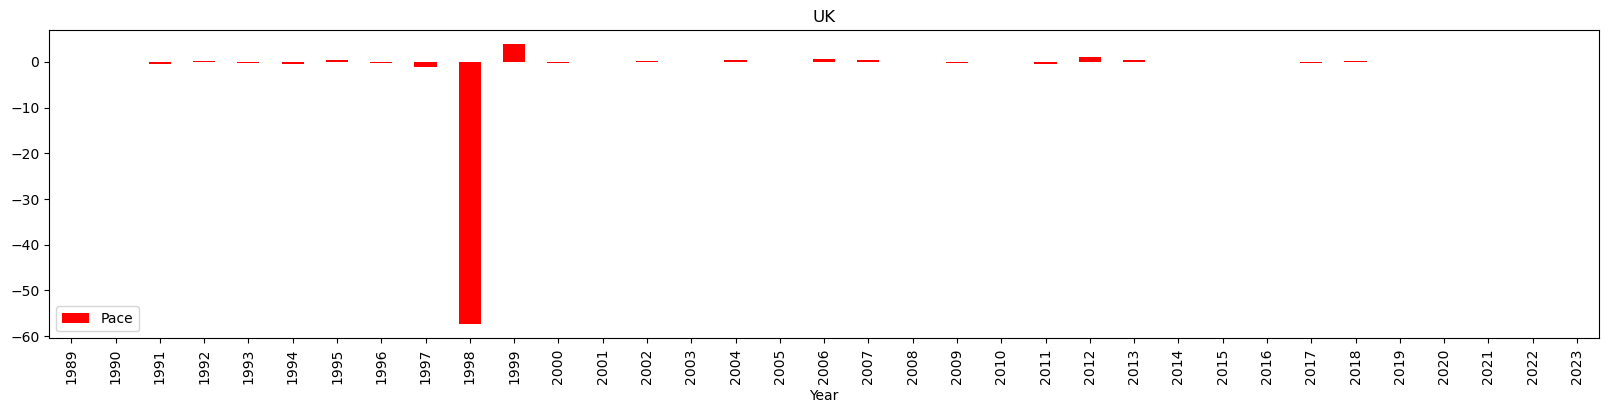

In [26]:
country = 'UK'
tmp_outl_difff = result_diff[result_diff['Country'] == country]
tmp_outl_difff = tmp_outl_difff[['Year','Pace']]
tmp_outl_difff.plot.bar(x='Year', figsize=(20, 4), title=country, color=['red', 'grey'])

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.precision", 2)

tmp_res_diff=result_diff.drop([f'{Indicator} [interpolated]_outliers', f'{Indicator} [interpolated]', 'cindex', 'Sum','Diff'], axis=1)
tmp_res_diff.replace([np.inf, -np.inf], np.nan, inplace=True)
tmp_res_diff = tmp_res_diff[tmp_res_diff['Pace'].notna()]
tmp_res_diff=tmp_res_diff.loc[(result_diff['Pace'] < -0.5)|(result_diff['Pace'] > 0.5)|(result_diff['Pace'] == 0)]
#tmp_res_diff['Pace'] = pd.qcut(q)
#tmp_res_diff.astype({'Pace': 'int32'}).dtypes
#tmp_res_diff['Pace'] = tmp_res_diff['Pace'].astype(int)
print(tmp_res_diff)

                               Country  Year      Pace
0                          Afghanistan  1989  0.00e+00
5                          Afghanistan  1994  4.13e+00
6                          Afghanistan  1995  2.34e+00
7                          Afghanistan  1996  1.24e+00
8                          Afghanistan  1997 -6.87e-01
9                          Afghanistan  1998 -2.59e+00
10                         Afghanistan  1999 -1.59e+01
12                         Afghanistan  2001 -1.04e+00
13                         Afghanistan  2002 -2.69e+01
14                         Afghanistan  2003 -2.70e+00
15                         Afghanistan  2004  7.87e-01
16                         Afghanistan  2005 -3.79e+00
18                         Afghanistan  2007  6.82e-01
21                         Afghanistan  2010  1.03e+00
23                         Afghanistan  2012 -8.35e-01
24                         Afghanistan  2013  1.07e+01
26                         Afghanistan  2015 -1.16e+00
27        

In [28]:
len(tmp_res_diff.index)

2028